# FlavorFusion Analysis


In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set a global color palette
sns.set_palette("colorblind")  # Example palette: 'viridis'

## Basic EDA

In [3]:
# Load data
df = pd.read_csv("data/interactions_train.csv")

# Drop unmapped id columns
df.drop(['user_id','recipe_id'],axis=1,inplace=True)

# Rename mapped id columns
df.rename(columns={"u": "user_id","i":"recipe_id"},inplace=True)
df.insert(0, "user_id", df.pop("user_id"))
df.insert(1, "recipe_id", df.pop("recipe_id"))

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])
df

,user_id,recipe_id,date,rating
0,22095,44367,2000-02-25,5.0
1,22095,87844,2000-02-25,5.0
2,24732,138181,2000-03-13,5.0
3,24732,93054,2000-03-13,4.0
4,22095,101723,2000-04-07,5.0
...,...,...,...,...
698896,13681,141067,2018-12-18,5.0
698897,14897,99787,2018-12-18,5.0
698898,11605,76163,2018-12-18,5.0
698899,3604,29101,2018-12-18,5.0


In [4]:
# Info on df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698901 entries, 0 to 698900
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    698901 non-null  int64         
 1   recipe_id  698901 non-null  int64         
 2   date       698901 non-null  datetime64[ns]
 3   rating     698901 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 21.3 MB


In [5]:
# Describe df
df.describe()

,user_id,recipe_id,date,rating
count,698901.000000,698901.000000,698901,698901.000000
mean,4249.330271,87519.330993,2008-09-02 00:41:45.707675392,4.574090
min,0.000000,0.000000,2000-02-25 00:00:00,0.000000
25%,455.000000,42988.000000,2006-11-16 00:00:00,4.000000
50%,1737.000000,87424.000000,2008-07-29 00:00:00,5.000000
75%,5919.000000,131731.000000,2010-04-09 00:00:00,5.000000
max,25075.000000,178262.000000,2018-12-19 00:00:00,5.000000
std,5522.602821,51290.370370,NaN,0.959022


In [6]:
# Shape of df
df.shape

(698901, 4)

Text(0.5, 1.0, 'Count by Rating')

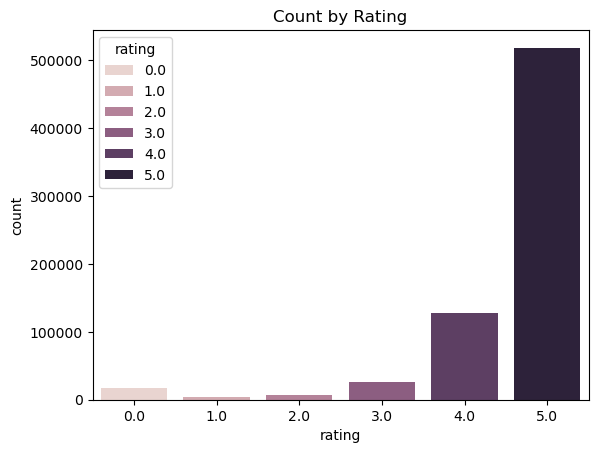

In [7]:
# Count by rating
sns.countplot(data=df, x='rating',hue='rating')#,palette='coolwarm')
plt.title("Count by Rating")

## Ratings by Date

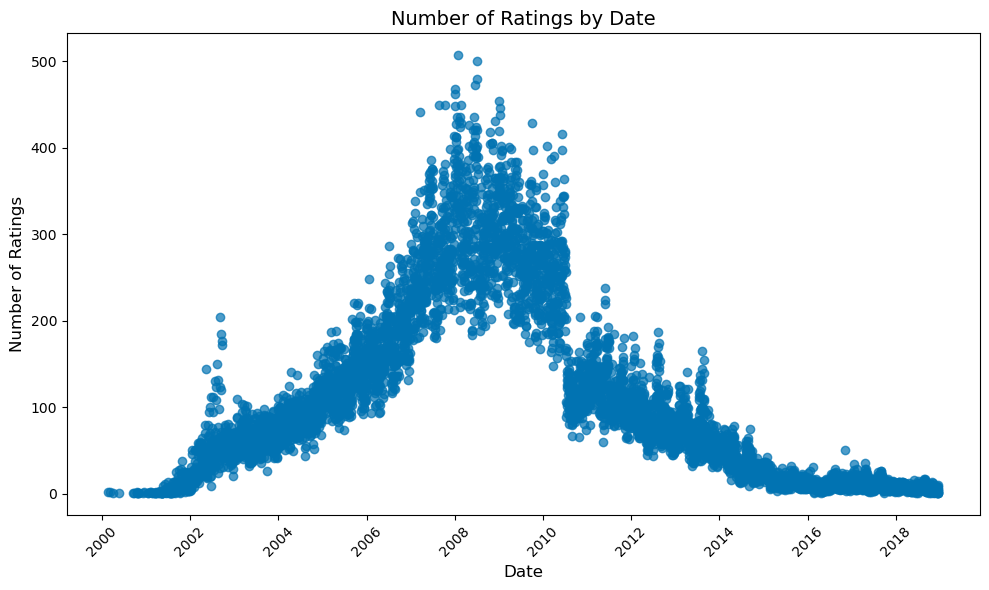

In [8]:
# Aggregate counts per date
date_counts = df.groupby('date').size().reset_index(name='count')

# Create the scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(date_counts['date'], date_counts['count'], alpha=0.7)

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.title('Number of Ratings by Date', fontsize=14)

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

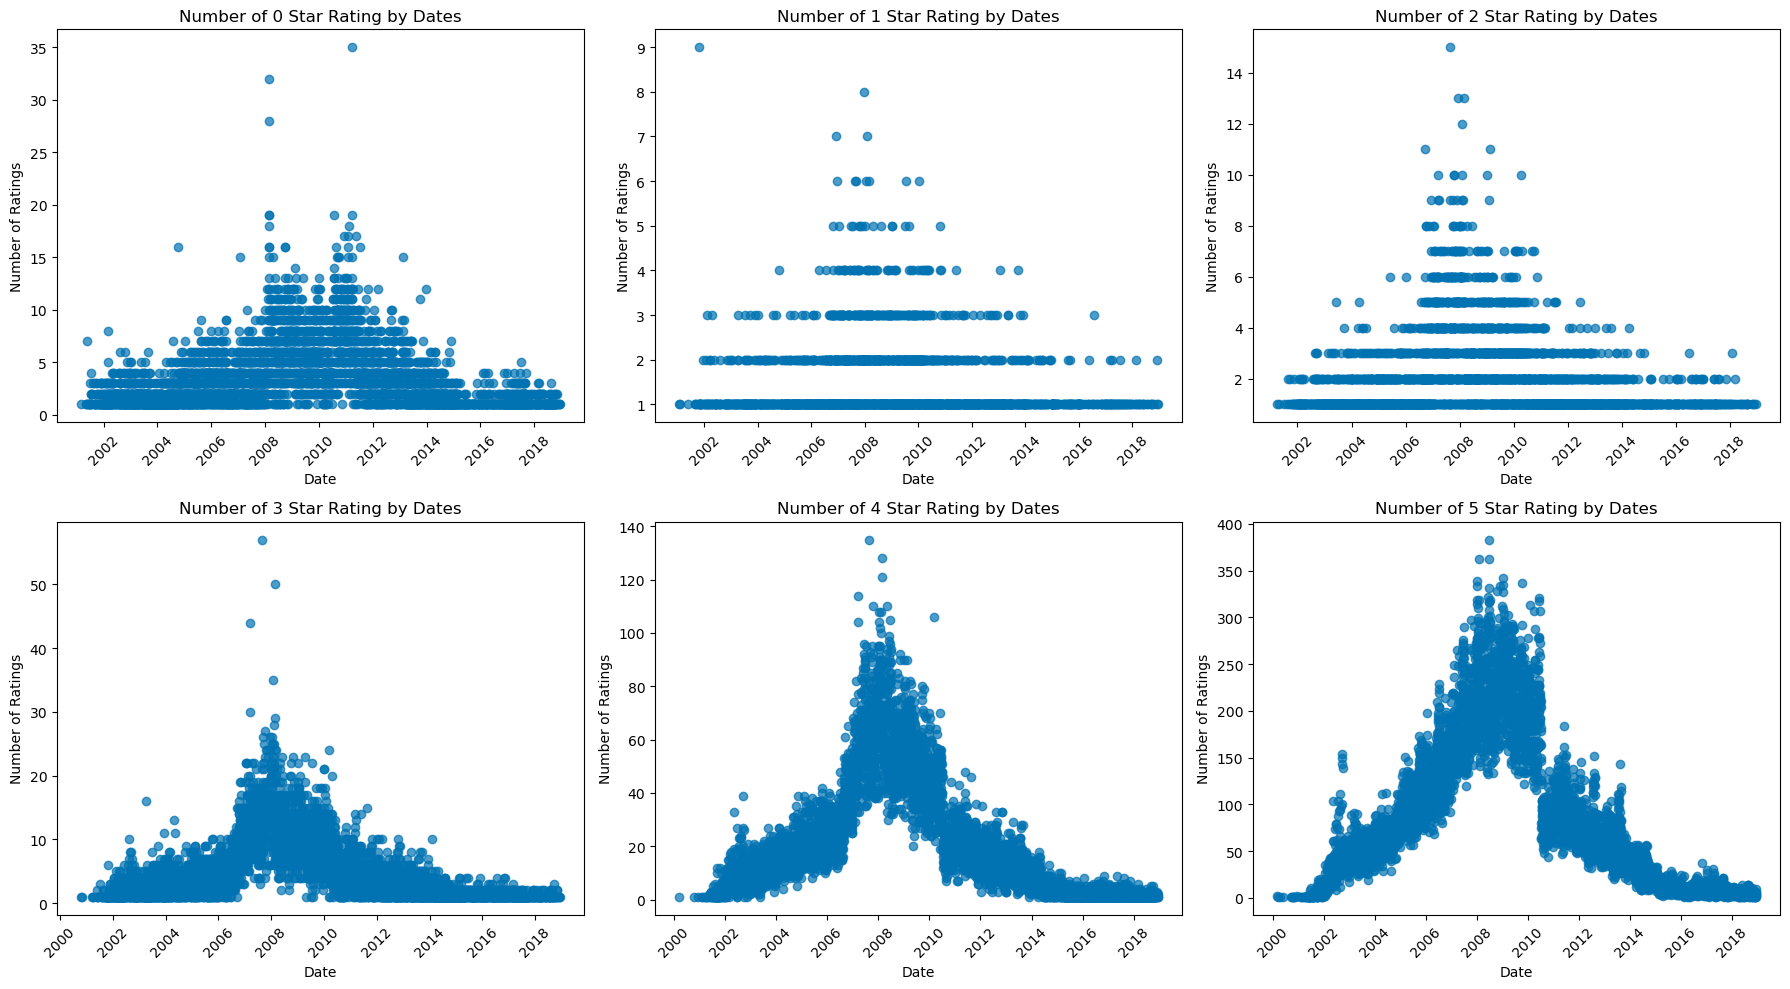

In [9]:
# Create a figure with 6 subplots (one for each rating)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Loop over each rating (1 through 5)
for i, rating in enumerate(range(0, 6)):
    # Filter data for the current rating
    rating_data = df[df['rating'] == rating]

    # Aggregate counts per date for this rating
    date_counts = rating_data.groupby('date').size().reset_index(name='count')

    # Plot the scatterplot for the current rating
    axes[i].scatter(date_counts['date'], date_counts['count'], alpha=0.7)
    axes[i].set_title(f"Number of {rating} Star Rating by Dates")
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Number of Ratings')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()
plt.show()

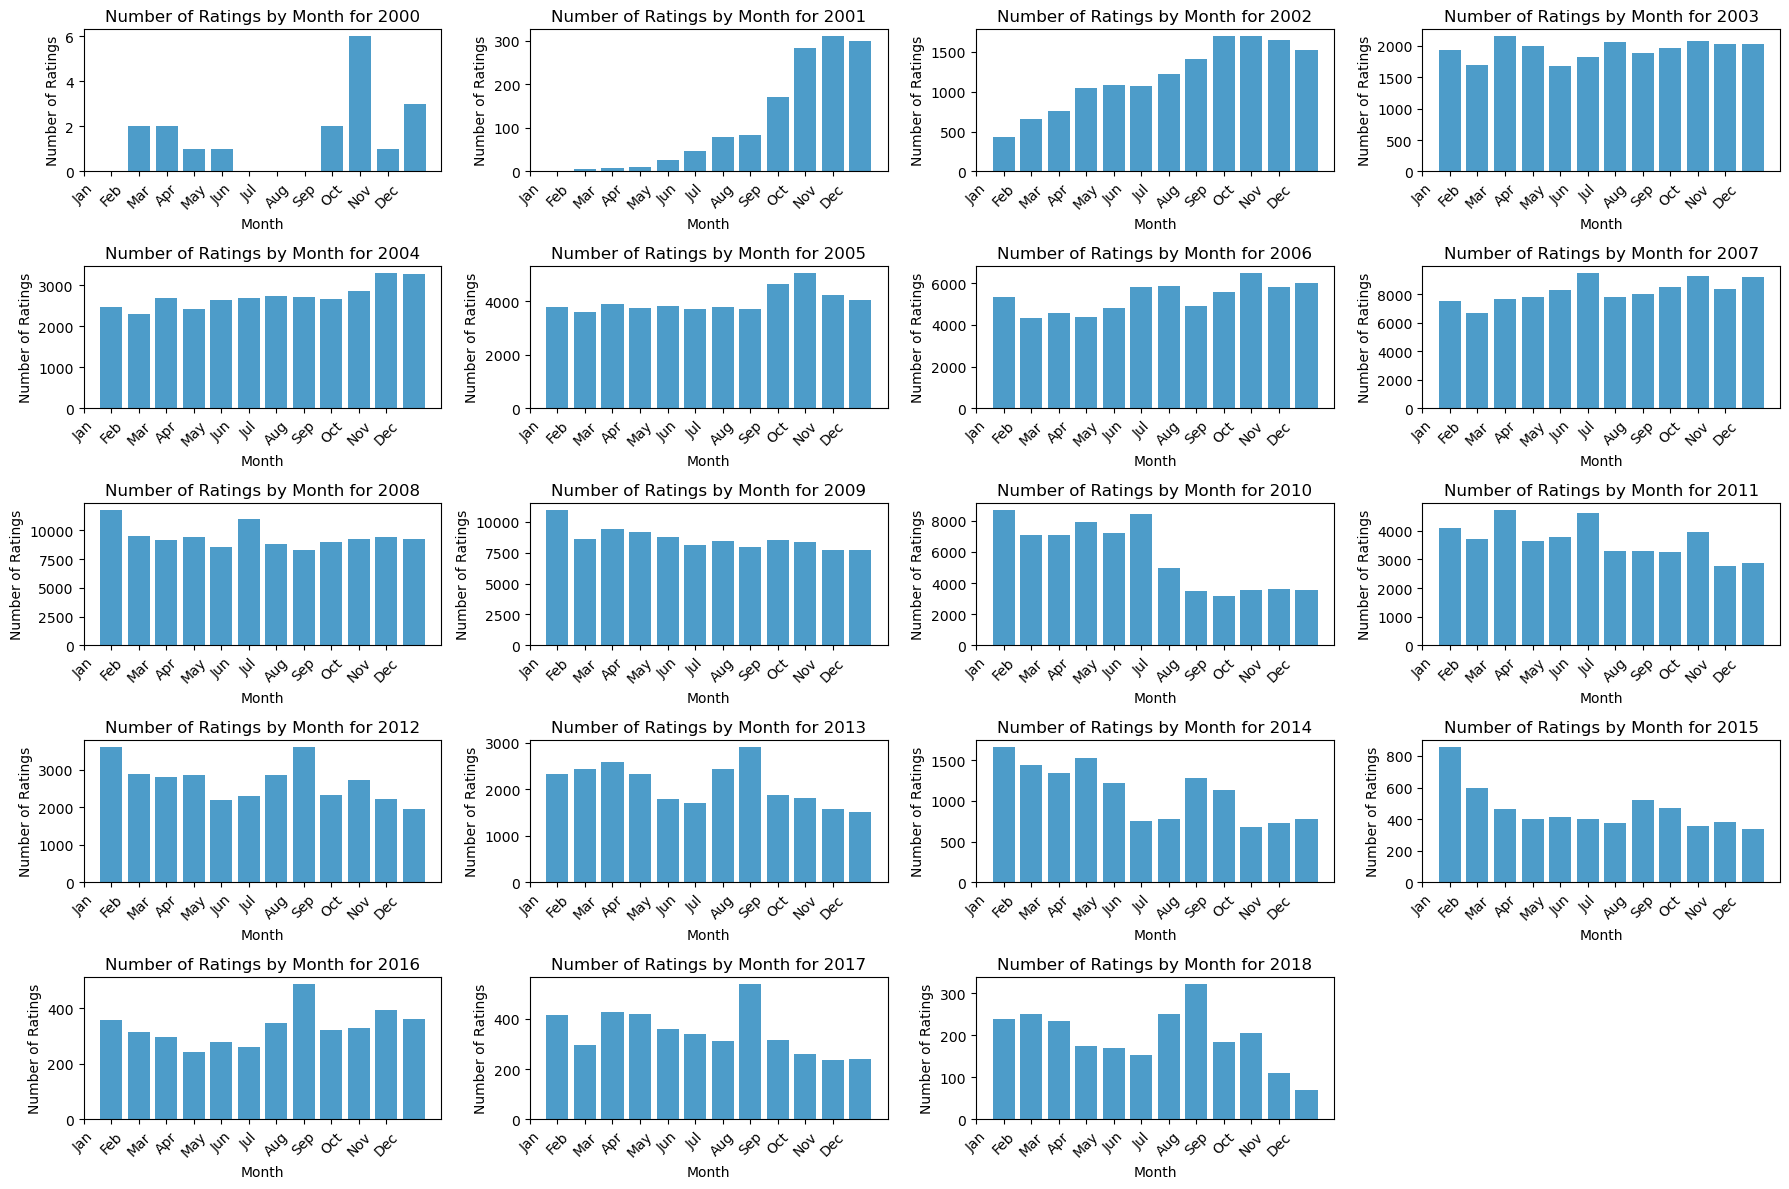

In [10]:
# Extract Year and Month as separate columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by Year and Month, and count ratings
monthly_counts = df.groupby(['year', 'month']).agg(count=('user_id', 'size')).reset_index()

# Loop through each unique year and plot
unique_years = monthly_counts['year'].unique()

# Create a figure with 19 subplots (one for each rating)
fig, axes = plt.subplots(5, 4, figsize=(18, 12))  # 5 rows, 4 columns
fig.delaxes(axes[4,3]) # Delete last ax
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# Loop over each rating (2000 through 2018)
for i, year in enumerate(range(2000, 2019)):

    # Filter data for the specific year
    year_data = monthly_counts[monthly_counts['year'] == year]

    # Create a bar plot for the year
    axes[i].bar(data=year_data, x='month', height='count', alpha=0.7)
    axes[i].set_xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Ratings')
    axes[i].set_title(f'Number of Ratings by Month for {year}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Adjust layout
plt.tight_layout()
plt.show()

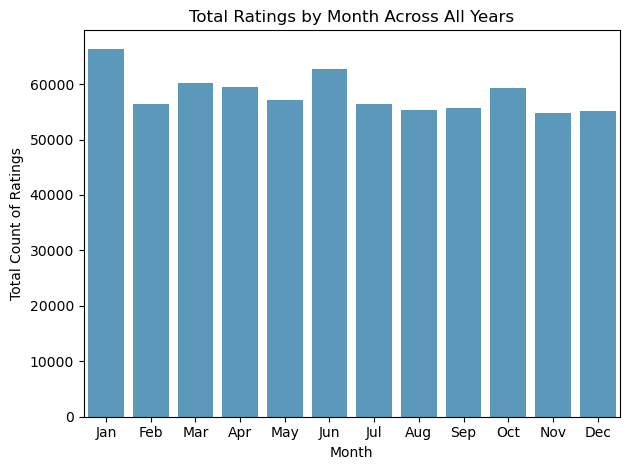

In [11]:
# Group by Month and sum counts across all years
monthly_counts = df.groupby('month').agg(count=('user_id', 'size')).reset_index()

# Plot the combined counts
sns.barplot(data=monthly_counts, x='month', y='count', alpha=0.7)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Total Count of Ratings')
plt.title('Total Ratings by Month Across All Years')
plt.tight_layout()
plt.show()

## Ratings by Users and Recipes

In [12]:
# Ratings by recipes
user_ratings = df.groupby('user_id') \
       .agg(num_of_ratings=('user_id', 'size'), avg_rating=('rating', 'mean')) \
       .reset_index()\
       .sort_values(by='num_of_ratings',ascending=False)
user_ratings

,user_id,num_of_ratings,avg_rating
94,94,6437,4.966755
275,275,4581,4.783672
193,193,3656,4.754923
241,241,3465,4.696104
208,208,3338,4.908328
...,...,...,...
7142,7142,2,5.000000
19610,19610,2,5.000000
19606,19606,2,5.000000
19601,19601,2,5.000000


Text(0.5, 1.0, 'Distribution of Num of Ratings by Users')

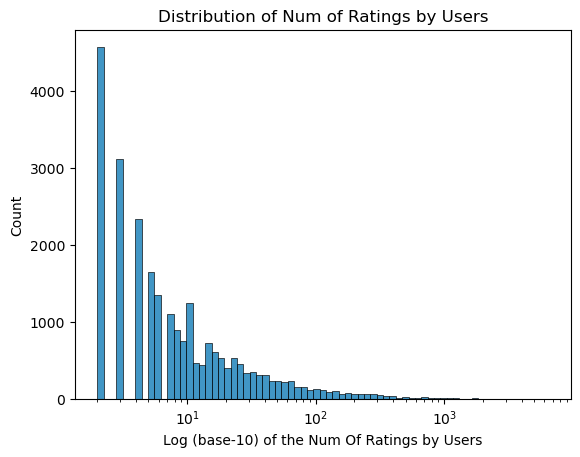

In [13]:
# Distribution of Num of Ratings by Users
sns.histplot(x=user_ratings['num_of_ratings'], log_scale=True)
plt.xlabel("Log (base-10) of the Num Of Ratings by Users")
plt.ylabel("Count")
plt.title("Distribution of Num of Ratings by Users")

Text(0.5, 1.0, 'Distribution of Num of Ratings by Users (with >100 Ratings)')

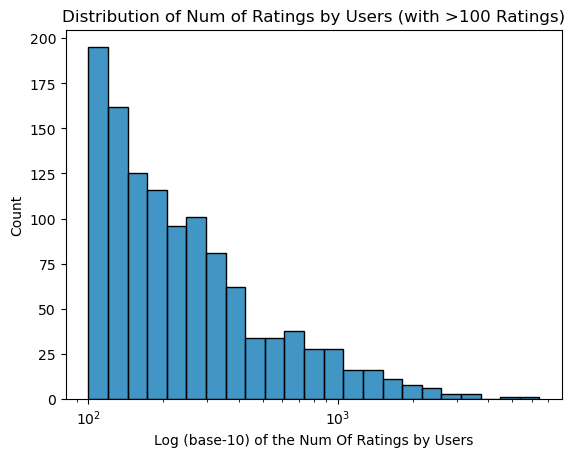

In [14]:
# Distribution of Ratings by Users who have given more than 100 Ratings
user_100 = user_ratings[user_ratings['num_of_ratings']>=100]
sns.histplot(x=user_100['num_of_ratings'], log_scale=True)
plt.xlabel("Log (base-10) of the Num Of Ratings by Users")
plt.ylabel("Count")
plt.title("Distribution of Num of Ratings by Users (with >100 Ratings)")

In [15]:
# Ratings by recipes
recipe_ratings = df.groupby('recipe_id') \
       .agg(num_of_ratings=('recipe_id', 'size'), avg_rating=('rating', 'mean')) \
       .reset_index()\
       .sort_values(by='num_of_ratings',ascending=False)
recipe_ratings

,recipe_id,num_of_ratings,avg_rating
92964,99787,1091,4.413382
124385,134610,1075,4.346977
125573,135961,897,4.608696
109379,117899,894,4.691275
135622,147374,787,4.777637
...,...,...,...
30269,32105,1,3.000000
30270,32106,1,4.000000
112638,121508,1,4.000000
17838,18876,1,4.000000


Text(0.5, 1.0, 'Distribution of Num of Ratings by Recipes')

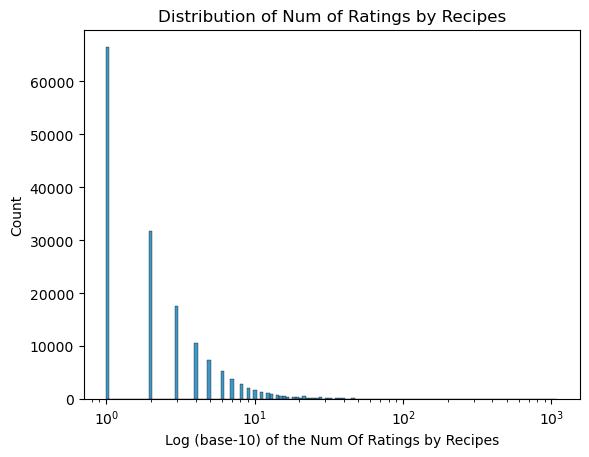

In [16]:
# Distribution of Num of Ratings per Recipe
sns.histplot(x=recipe_ratings['num_of_ratings'], log_scale=True)
plt.xlabel("Log (base-10) of the Num Of Ratings by Recipes")
plt.ylabel("Count")
plt.title("Distribution of Num of Ratings by Recipes")

Text(0.5, 1.0, 'Distribution of Num of Ratings by Recipes (with >50 Ratings)')

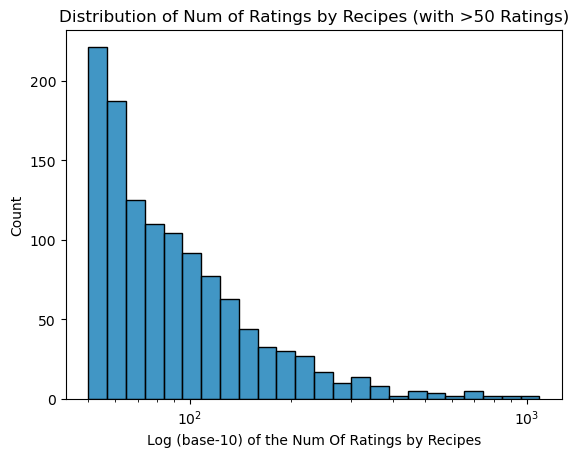

In [17]:
# Distribution of Ratings for Recipe with more than 100 Ratings
recipe_100 = recipe_ratings[recipe_ratings['num_of_ratings']>=50]
sns.histplot(x=recipe_100['num_of_ratings'], log_scale=True)
plt.xlabel("Log (base-10) of the Num Of Ratings by Recipes")
plt.ylabel("Count")
plt.title("Distribution of Num of Ratings by Recipes (with >50 Ratings)")

## Missing Values

In [18]:
# Find missing values
df.isnull().sum()

user_id      0
recipe_id    0
date         0
rating       0
year         0
month        0
dtype: int64

There are no missing values in the dataset.

## Sparsity of dataset

In [4]:
# Find number of users, recipes, and ratings
num_users = df['user_id'].nunique()
num_items = df['recipe_id'].nunique()
num_ratings = len(df)

# Find the sparsity of the dataset
sparsity = 1 - (num_ratings / (num_users * num_items))
print(f"Sparsity: {sparsity:.2%}")


Sparsity: 99.98%
